In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [36]:
bs = 64

In [37]:
path = Path('../input/chest_xray/chest_xray')
path.ls()

[PosixPath('../input/chest_xray/chest_xray/test'),
 PosixPath('../input/chest_xray/chest_xray/train'),
 PosixPath('../input/chest_xray/chest_xray/val'),
 PosixPath('../input/chest_xray/chest_xray/.DS_Store')]

torch.Size([3, 1225, 1632])


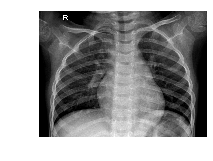

In [38]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [39]:
tfms = get_transforms()

In [40]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  valid_pct=0.2,
                                  size=224, bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

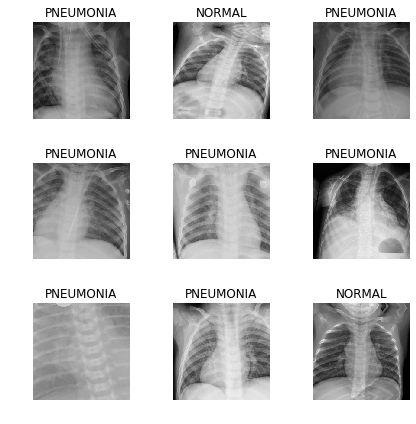

In [41]:
data.show_batch(3, figsize=(6,6))

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4685, 1171)

> - we have a very small validation set so some augmentation is needed

In [43]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="/tmp/model/")

In [44]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.357913,0.221262,0.925705,03:34
1,0.231108,0.128516,0.947054,03:34
2,0.167147,0.124271,0.948762,03:32
3,0.144756,0.126080,0.948762,03:32


In [45]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

In [46]:
len(data.valid_ds)==len(losses)==len(idxs)

True

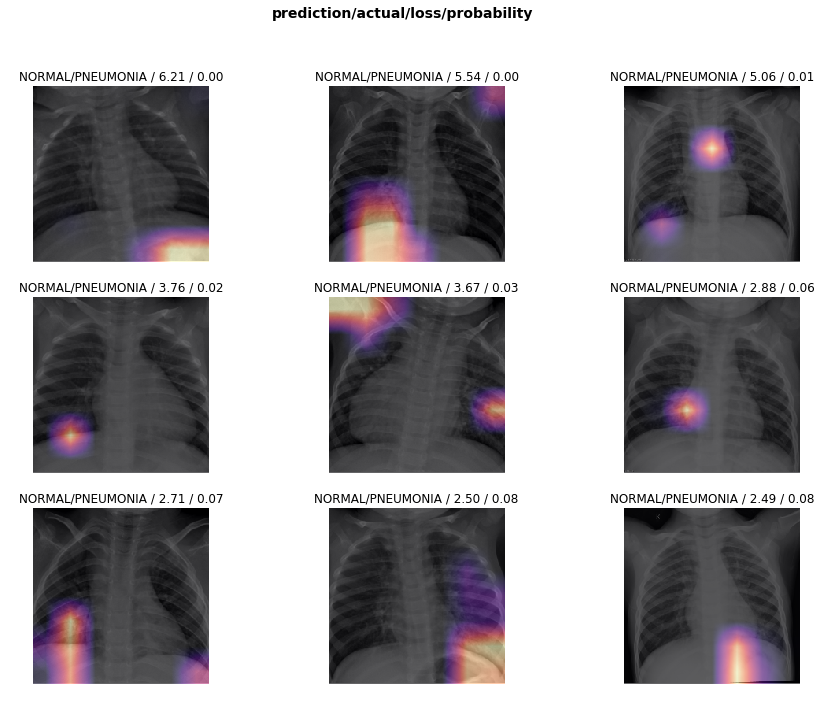

In [47]:
interp.plot_top_losses(9, figsize=(15,11))

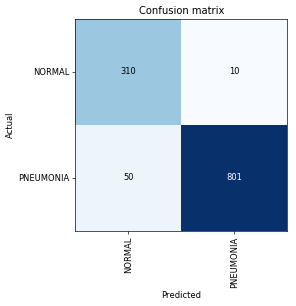

In [48]:
# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [49]:
learn.save('stage-1')

In [50]:
learn.unfreeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


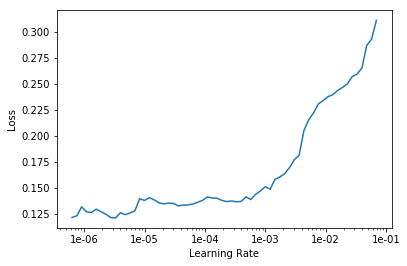

In [52]:
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(10, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.137483,0.117967,0.950470,03:32
1,0.123441,0.129406,0.953032,03:31
2,0.101338,0.101383,0.960717,03:32
3,0.087608,0.106369,0.960717,03:31
4,0.081159,0.081924,0.972673,03:31
5,0.069165,0.085126,0.965841,03:31
6,0.064280,0.095065,0.961571,03:32
7,0.058164,0.093187,0.961571,03:31
8,0.049488,0.092882,0.962425,03:32
9,0.046412,0.090998,0.963279,03:31


In [54]:
learn.save('stage-2')

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

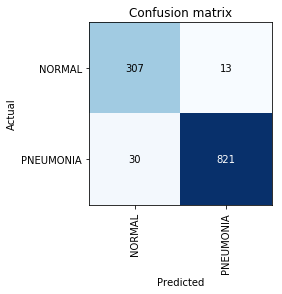

In [58]:
con=interp.plot_confusion_matrix()

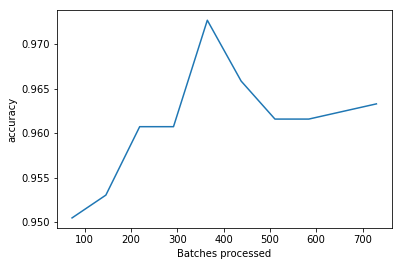

In [57]:
learn.recorder.plot_metrics()

In [1]:
cm=interp.confusion_matrix()
tn, fp, fn, tp = cm.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
F1= 2*(recall * precision) / (recall + precision)
print("F1 score of the model is {:.2f}".format(F1))
print("Accuracy of the model is {:.2f}".format(accuracy))

Recall of the model is 0.96
Precision of the model is 0.98
F1 score of the model is 0.97
Accuracy of the model is 0.96
